In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib notebook

sns.set_style("darkgrid")

In [16]:
posts = pd.read_csv("../data/all_posts.csv", index_col="id")

In [17]:
posts.sample(5)

,author,full_link,num_comments,title,gilded,score,selftext,age,gender,average_rating
id,,,,,,,,,,
8a67r4,__tom_hanks__,https://www.reddit.com/r/Rateme/comments/8a67r...,7.0,M 28.,0.0,1.0,NaN,28.0,M,5.750000
5g1w88,[deleted],https://www.reddit.com/r/Rateme/comments/5g1w8...,2.0,(18M) go for it!,0.0,3.0,[deleted],18.0,M,6.000000
2p7i55,[deleted],https://www.reddit.com/r/Rateme/comments/2p7i5...,0.0,[M19] Let's try this again.,0.0,1.0,Hi guys.\nThis is the album: http://imgur.com/...,19.0,M,NaN
707tqh,SoNotMarshall,https://www.reddit.com/r/Rateme/comments/707tq...,3.0,20 [M] it's a boring Thursday night and I'm cu...,NaN,1.0,http://imgur.com/a/wfJC5 \n\nI'm 20M in colleg...,20.0,M,8.000000
3zk1w9,[deleted],https://www.reddit.com/r/Rateme/comments/3zk1w...,23.0,[20F] Nigerian girl here,0.0,58.0,[deleted],20.0,F,7.594444


In [18]:
gt5 = posts[posts.num_comments > 5]

In [19]:
posts.gender = posts.gender.str.upper()

# Age Distribution

Very much exponential distribution. You can see when we plot log scale, the range from 20 to 60 is pretty much linearly decreasing.

<IPython.core.display.Javascript object>


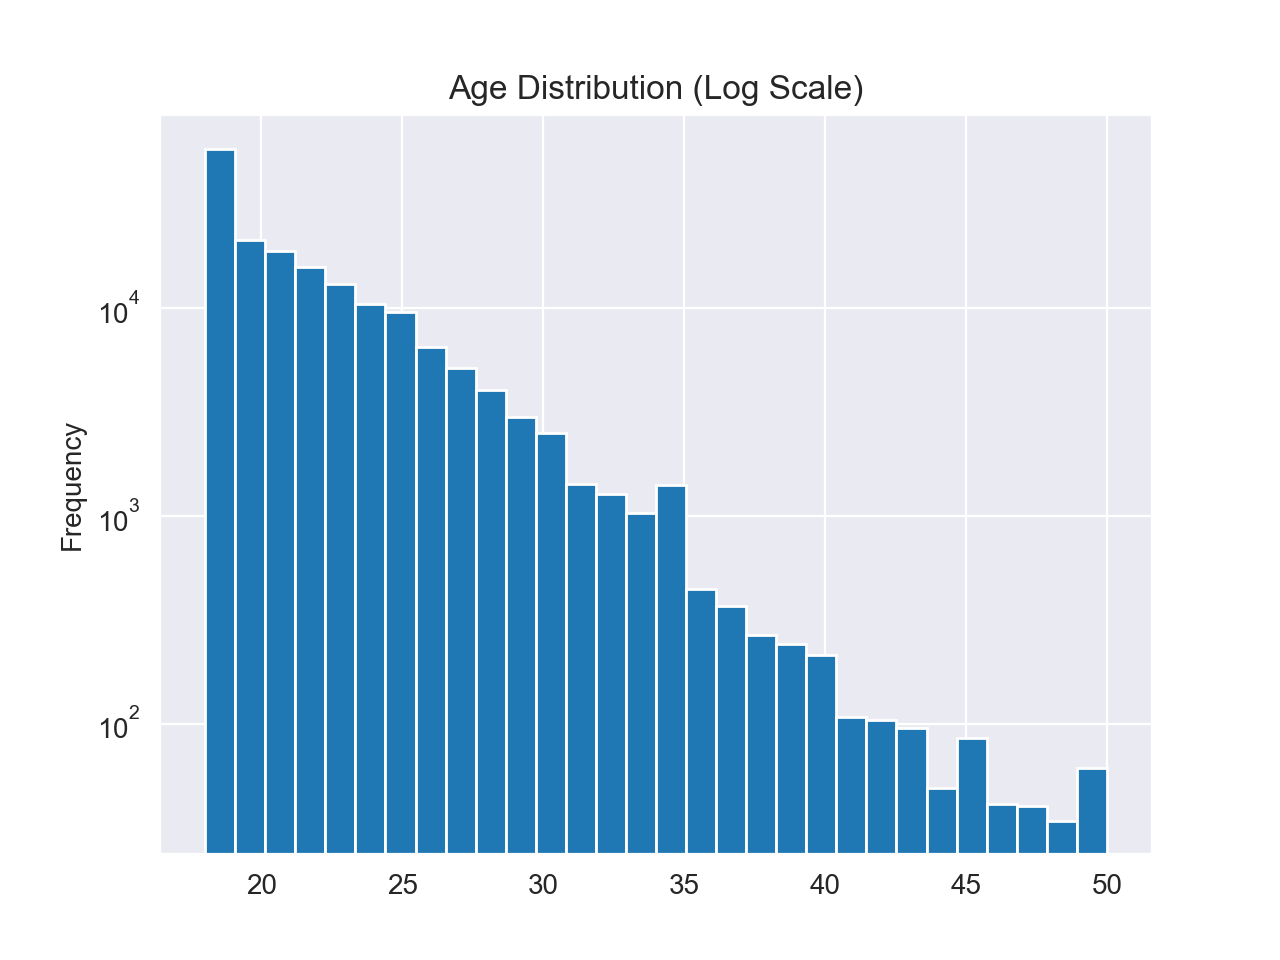

In [25]:
age_gender_posts = posts.dropna(subset=["age", "gender"])
age_gender_posts = age_gender_posts[age_gender_posts.age <= 50]
age_gender_posts["age"].plot.hist(bins=30, title="Age Distribution (Log Scale)", log=True)


<IPython.core.display.Javascript object>


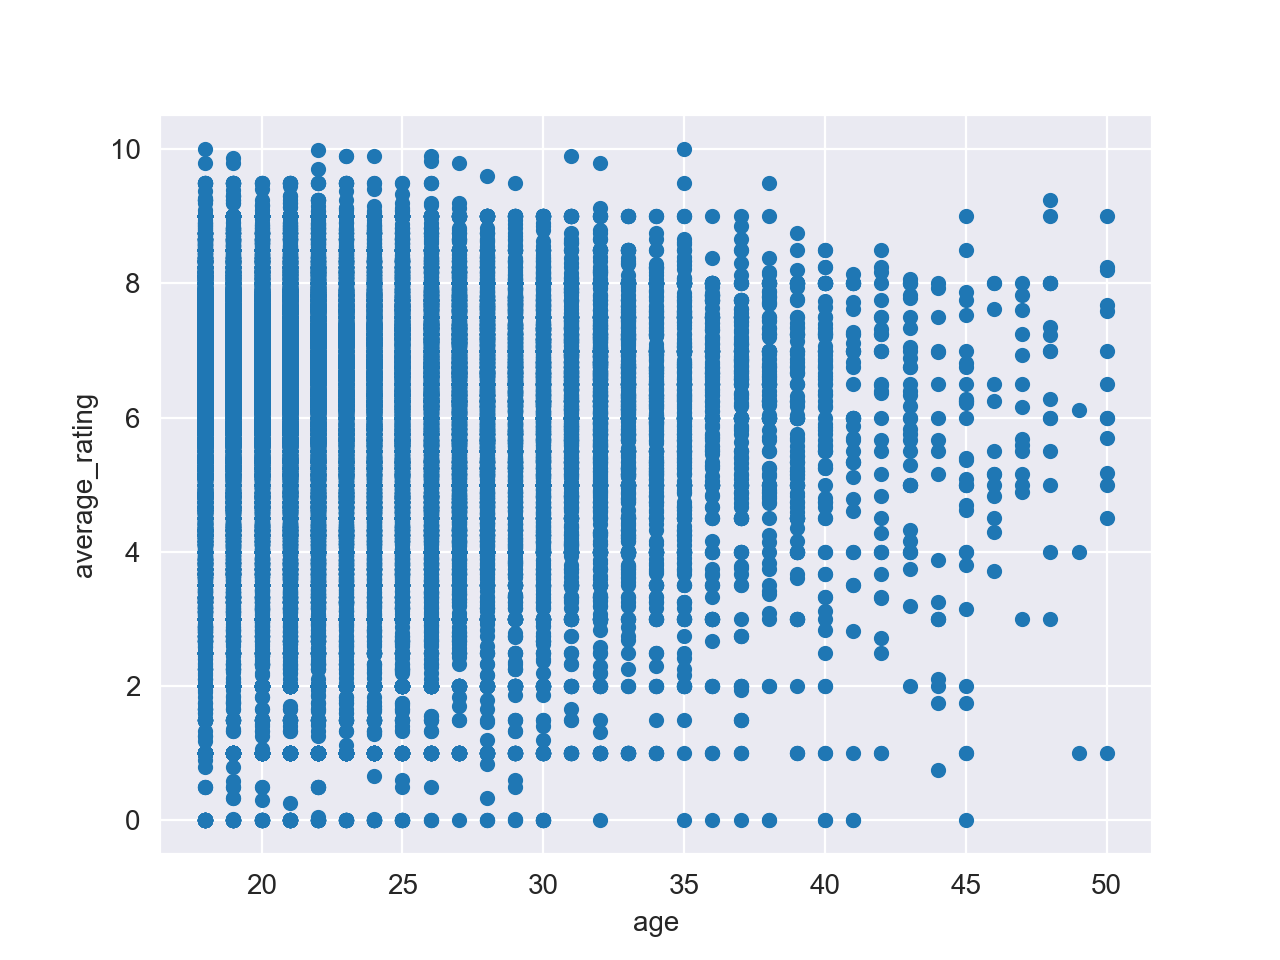

In [26]:
age_gender_posts.plot.scatter(x="age", y="average_rating")

<IPython.core.display.Javascript object>


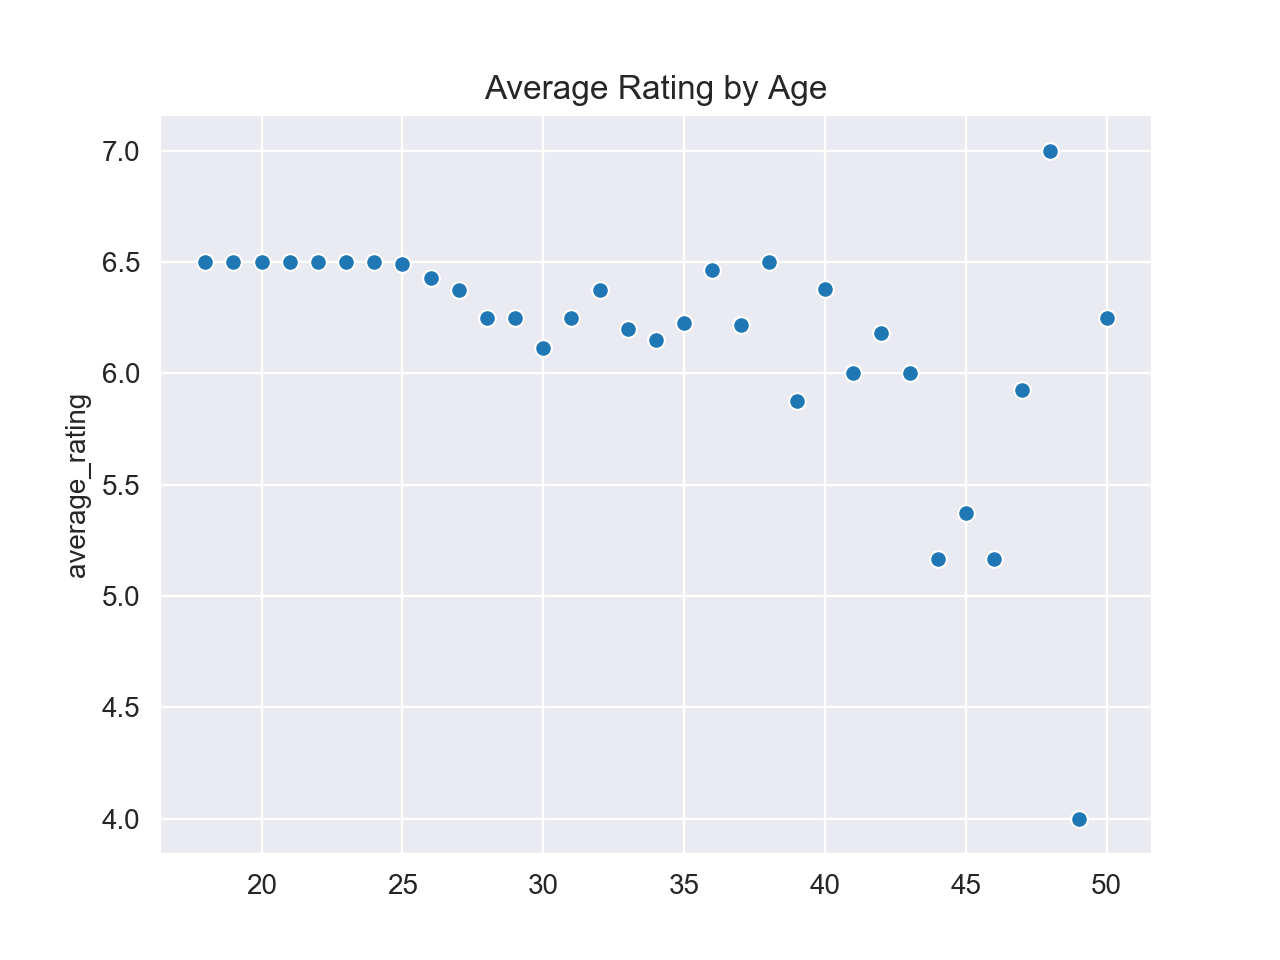

Text(0.5, 1.0, 'Average Rating by Age')

In [27]:
sns.scatterplot(list(age_gender_posts.groupby("age").indices.keys()),
                age_gender_posts.groupby("age").average_rating.agg("median")
               ).set_title("Average Rating by Age")

# Rating Distribution

In [28]:
rating_posts = posts.dropna(subset=["average_rating"])

<IPython.core.display.Javascript object>


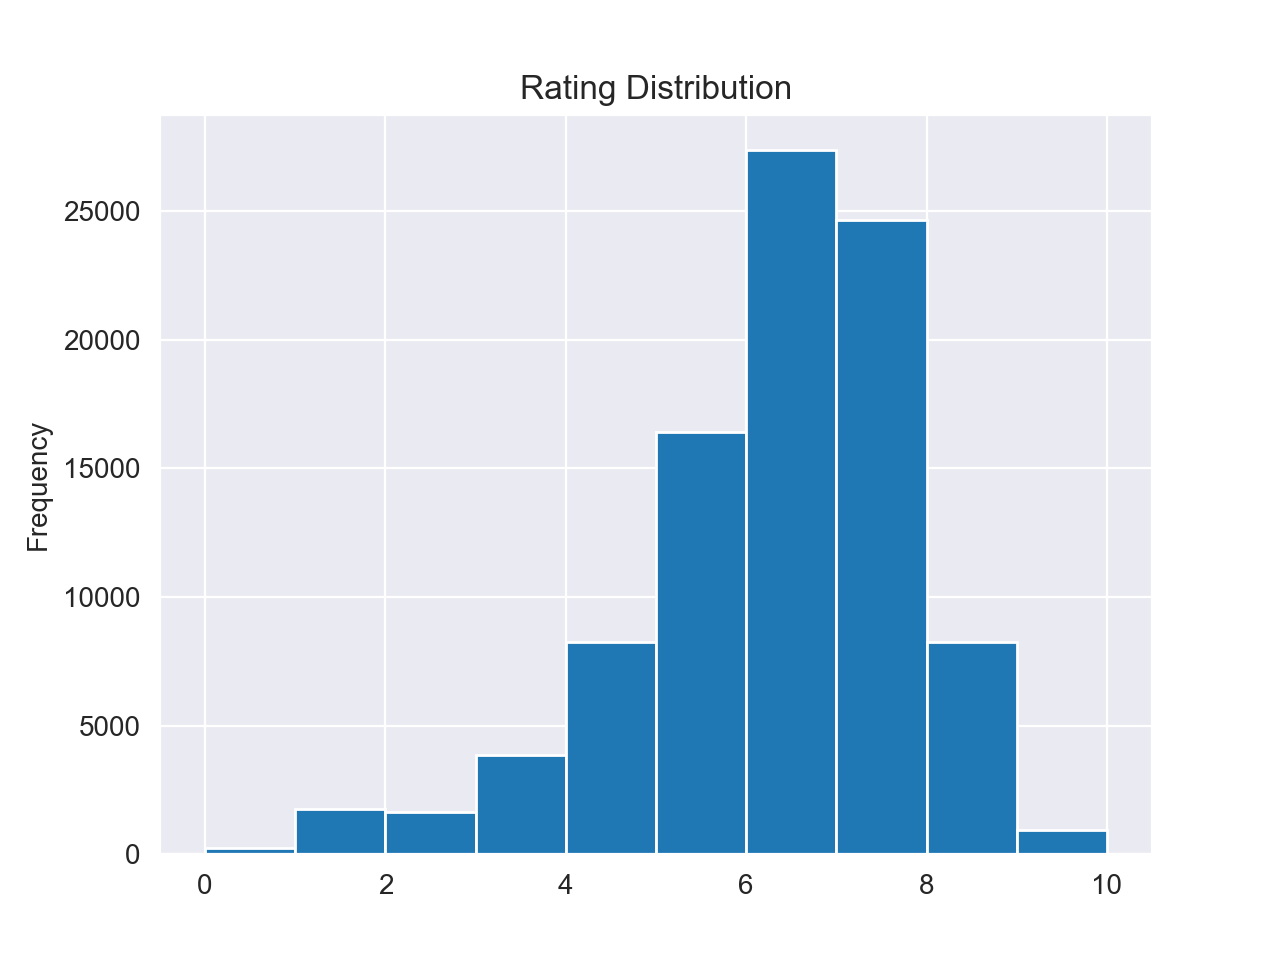

In [29]:
rating_posts.average_rating.plot.hist(title="Rating Distribution")

<IPython.core.display.Javascript object>


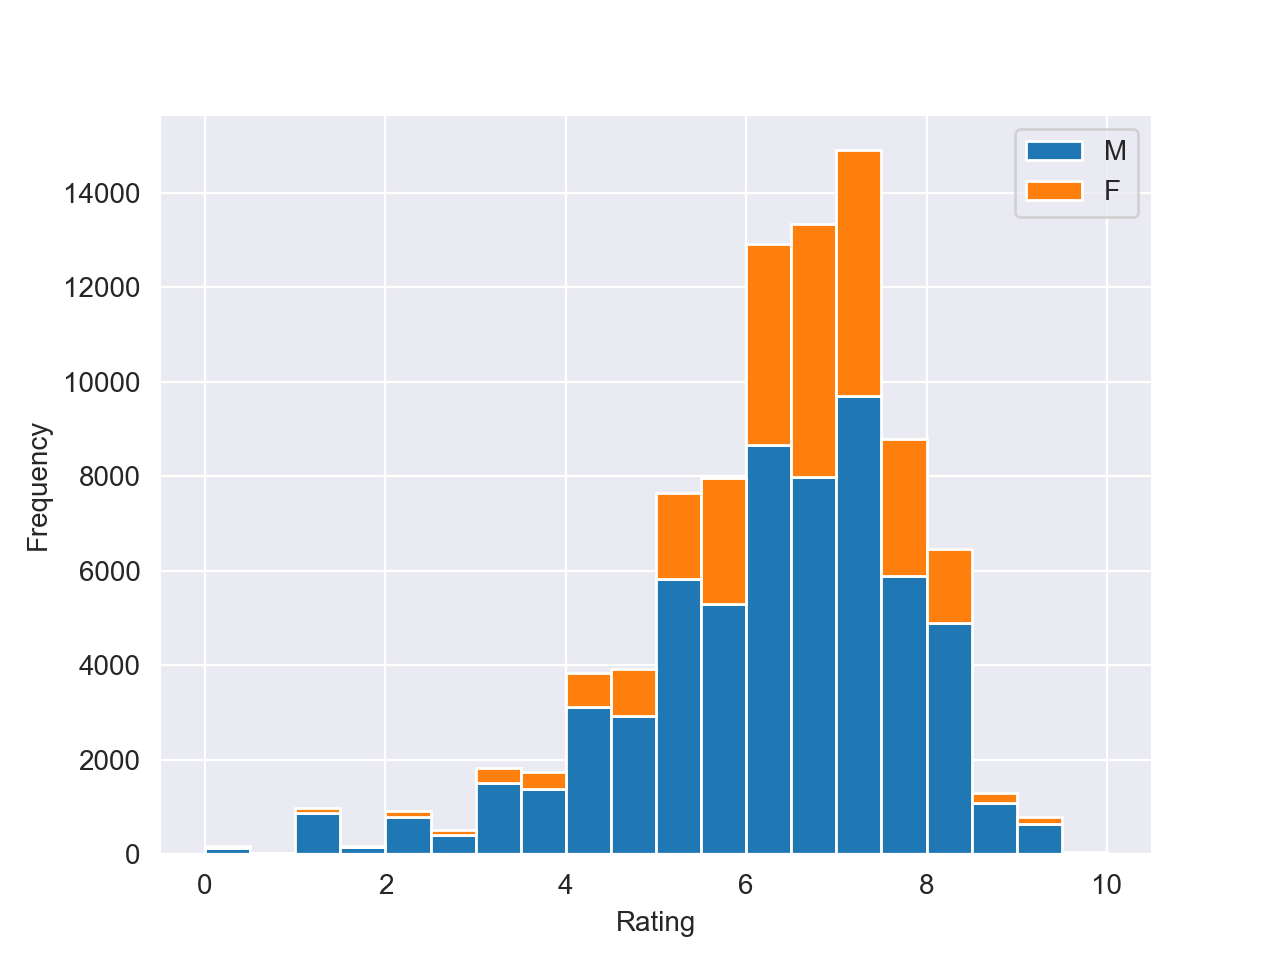

Text(0, 0.5, 'Frequency')

In [30]:
genders = rating_posts.groupby("gender")
fig, ax = plt.subplots()
ax.hist([genders.get_group("M").average_rating, genders.get_group("F").average_rating],
         stacked=True,
         bins=20, label=["M", "F"])
ax.legend()
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")

<IPython.core.display.Javascript object>


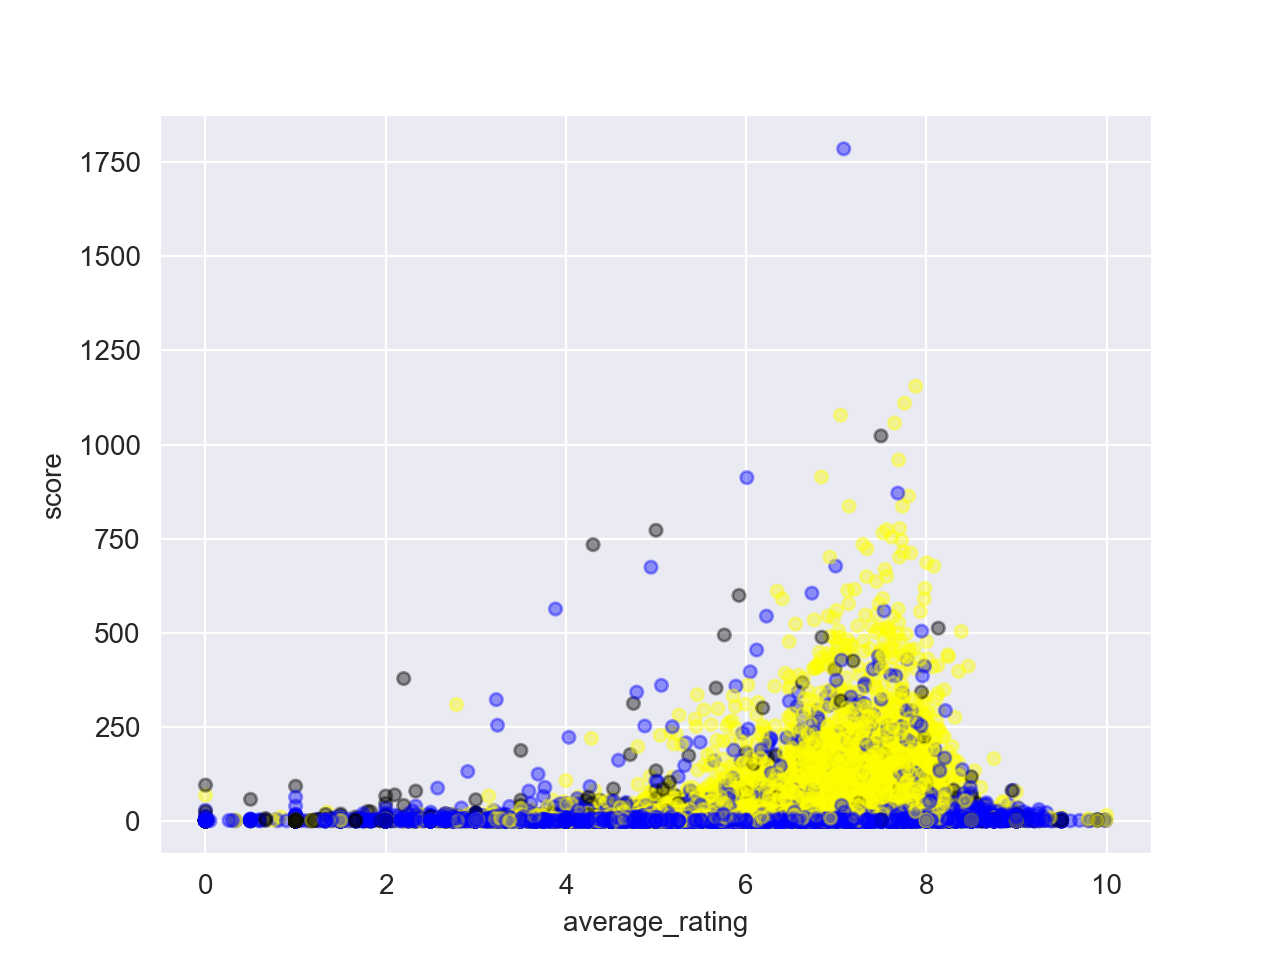

In [31]:
colors = {"M": "blue", "F": "yellow"}
rating_posts.plot.scatter(x="average_rating",
                          y="score",
                          color=[colors[m] if m in colors else "black" for m in rating_posts.gender],
                          alpha=0.4)

The arc of high scoring / low rating corresponds to progress p

<IPython.core.display.Javascript object>


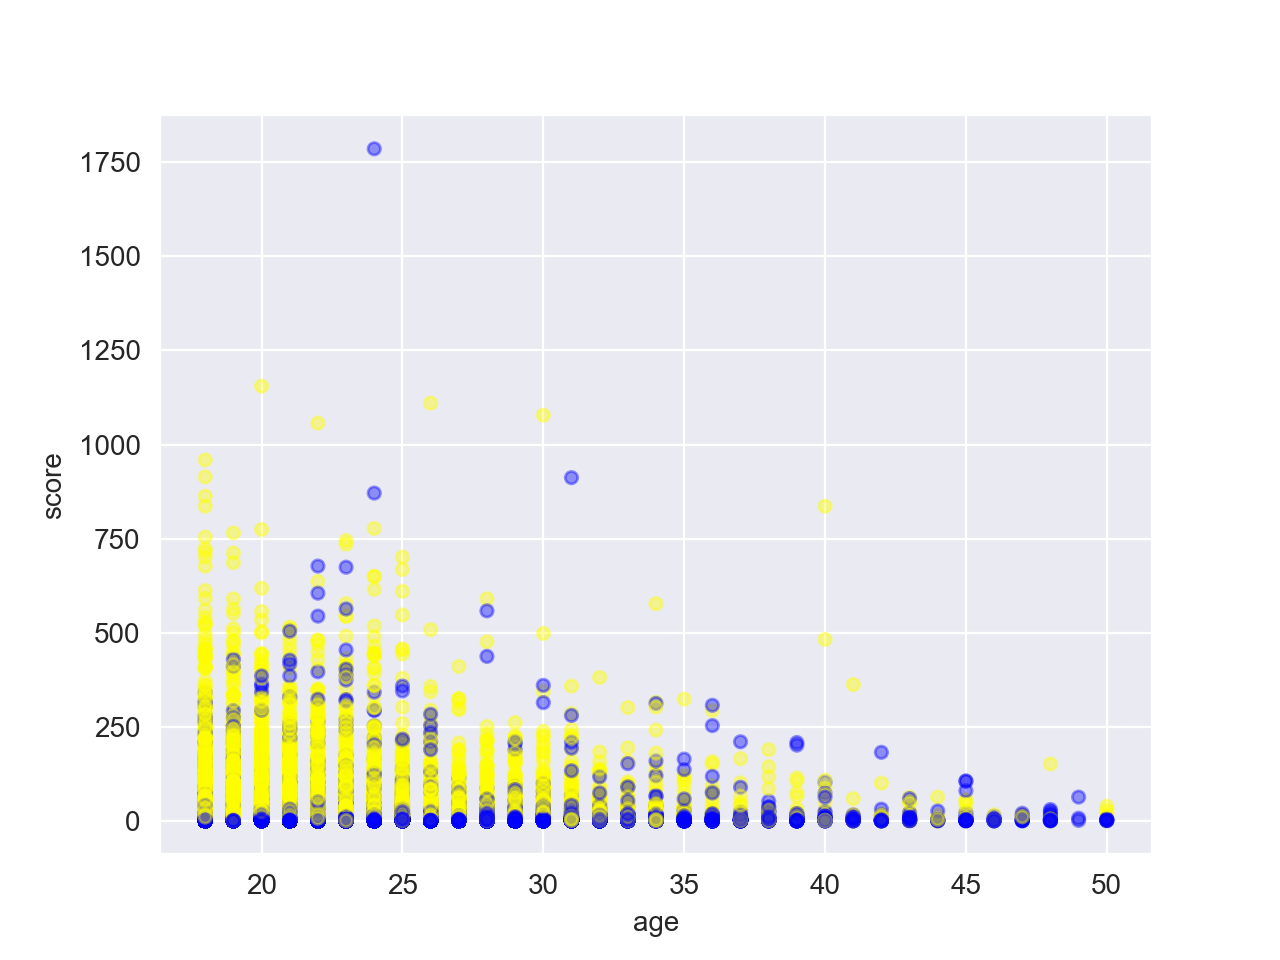

In [32]:
rating_posts = rating_posts[rating_posts.age <= 50]
rating_posts.plot.scatter(x="age",
                          y="score",
                          color=[colors[m] if m in colors else "black" for m in rating_posts.gender],
                          alpha=0.4)

Roughly, higher-scoring males tend to be older than higher-scoring females.

<IPython.core.display.Javascript object>


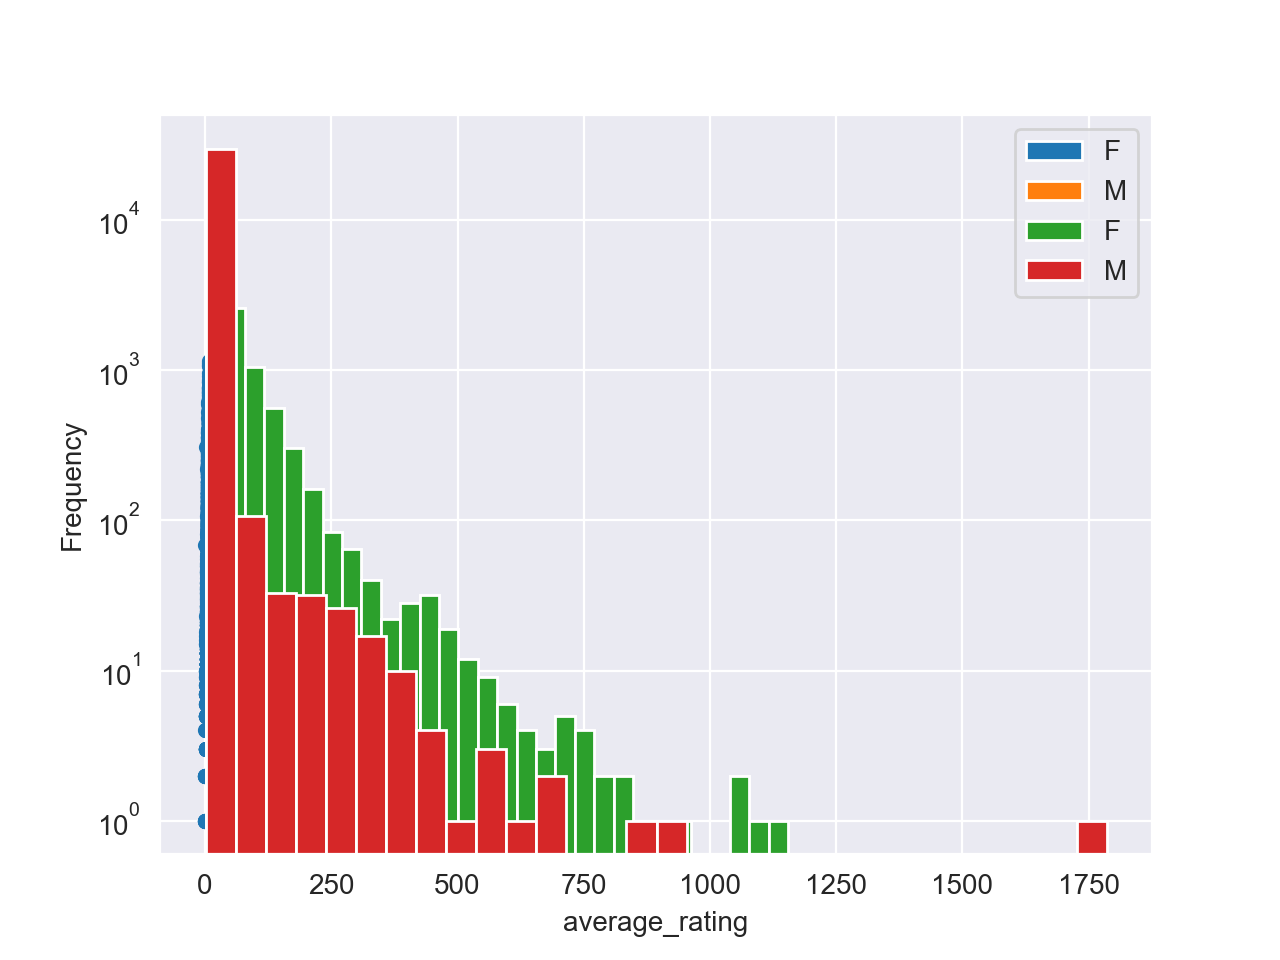

<IPython.core.display.Javascript object>


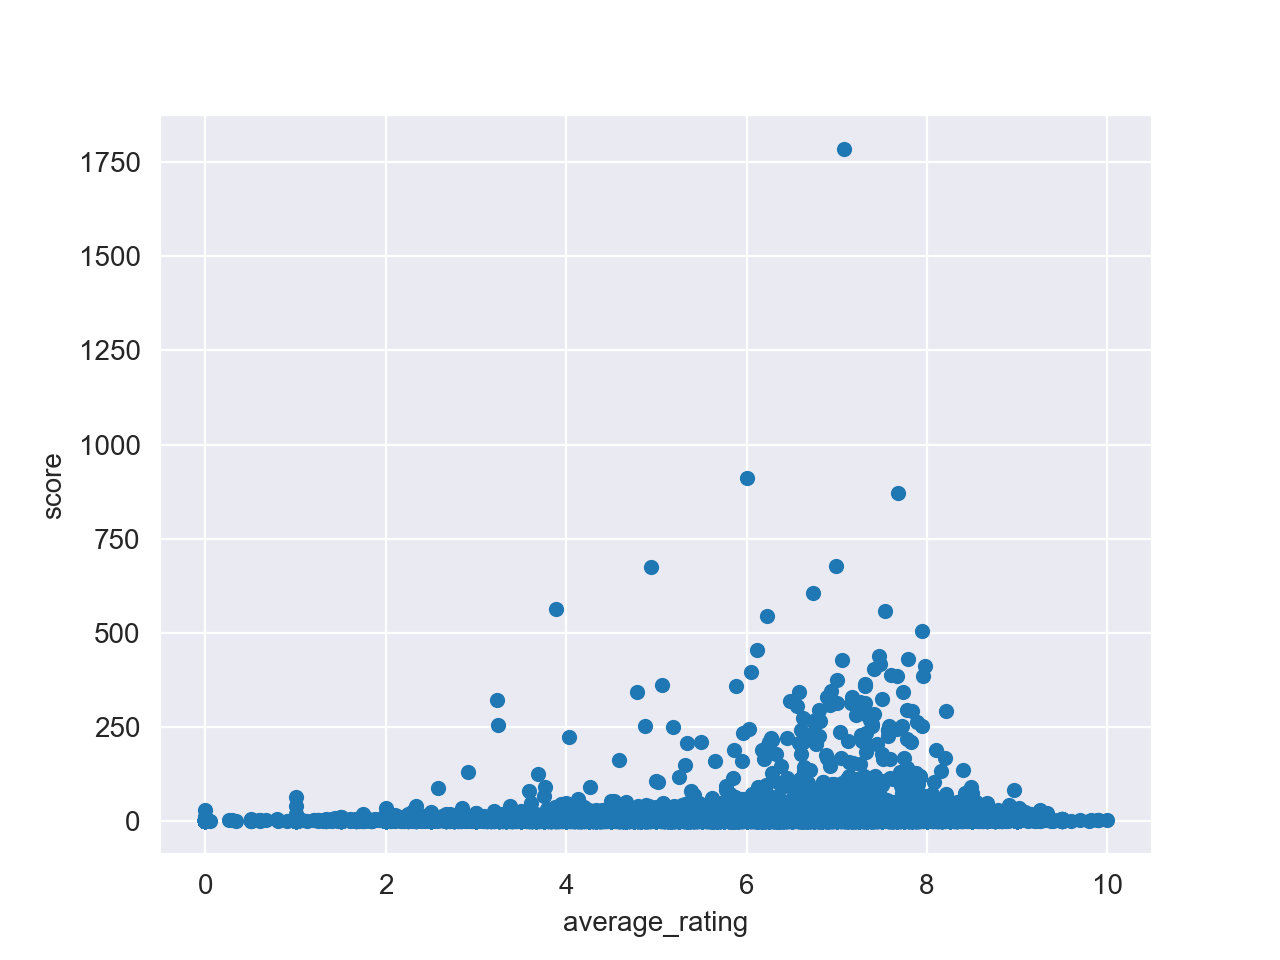

gender
F    AxesSubplot(0.125,0.11;0.775x0.77)
M    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

In [33]:
rating_posts.groupby("gender").plot.scatter(x="average_rating", y="score")

In [34]:
rating_posts.groupby("gender").average_rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,26886.0,6.455179,1.231987,0.0,5.891304,6.666667,7.27128,10.00
M,61360.0,6.109193,1.594242,0.0,5.200000,6.400000,7.25000,9.99


In [35]:
rating_posts.groupby("gender").score.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,26886.0,27.828684,56.917160,0.0,2.0,9.0,29.0,1155.0
M,61360.0,3.568008,16.697968,0.0,1.0,1.0,3.0,1786.0


<IPython.core.display.Javascript object>


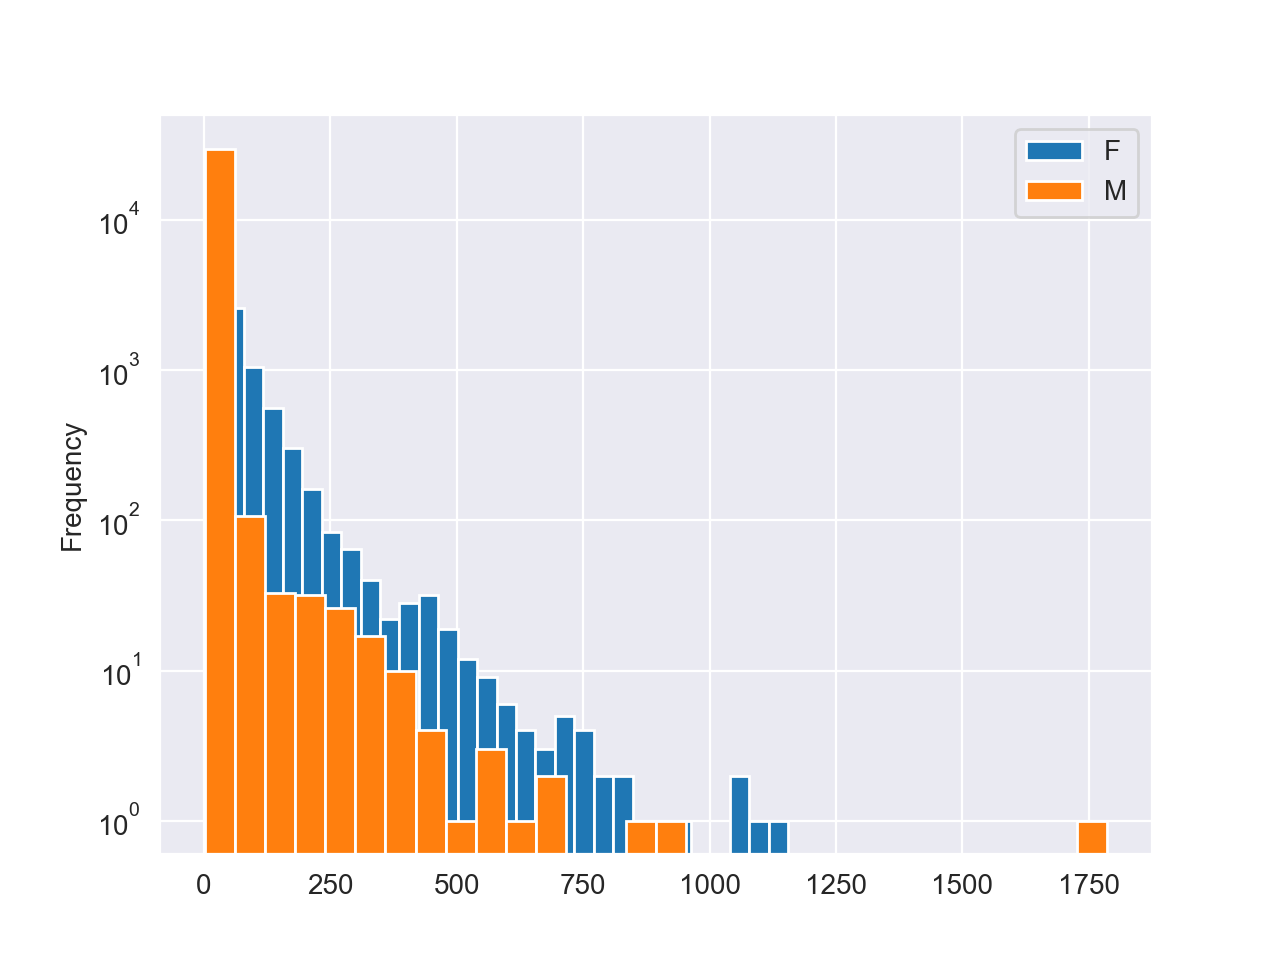

gender
F    AxesSubplot(0.125,0.11;0.775x0.77)
M    AxesSubplot(0.125,0.11;0.775x0.77)
Name: score, dtype: object

In [38]:
plt.figure()
rating_posts[rating_posts.score > 1].groupby("gender")["score"].plot.hist(bins=30, log=True, legend=True)

In [118]:
import webbrowser

webbrowser.open(rating_posts.loc[42604].full_link)

True

In [111]:
comments = pd.read_csv("../data/comments.csv")

/Users/naitian/Documents/Projects/MDST/rateme/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
comments.loc[159440].body

'Speaking objectively: 9.5/10 :) \n\nSpeaking as a fan of nose rings: 10/10 :)'

In [147]:
posts[(posts.average_rating < 5) &(posts.score > 600)].iloc[0]

id                                                                  bxu93p
author                                                             HY4ever
full_link                https://www.reddit.com/r/Rateme/comments/bxu93...
num_comments                                                           125
title                    Im a 25 year old 4' 10" mom who recently lost ...
gilded                                                                 NaN
score                                                                  734
selftext                                                               NaN
total_awards_received                                                    0
age                                                                    NaN
gender                                                                 NaN
average_rating                                                     4.30165
Name: 18131, dtype: object